In [1]:
import numpy as np #used for working with arrays
import pandas as pd #Data Frames and Structures
import matplotlib as mpl #Visualizations
import matplotlib.pyplot as plt #Visualizations
import seaborn as sns #Statistical Graphics Plotting
import statistics #Statistical Analysis
import statsmodels.api as sm #Classes and functions for estimation of statistical models
import statsmodels.formula.api as smf #Fit Statistical Models
import statistics

from sklearn import preprocessing #Normalization
from sklearn.model_selection import cross_val_score,train_test_split #Model CV Score and Training/Testing
from sklearn import metrics #Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error #MAE for Determining Model Accuracy
from sklearn.metrics import mean_squared_error #MSE for Determining Model Accuracy
from sklearn.metrics import r2_score #Coefficient of Determination
from sklearn.linear_model import LinearRegression #Modeling Method - Linear Regression
from sklearn.tree import DecisionTreeRegressor #Modeling Method - Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor #Modeling Method -Random Forest Regressor
from sklearn.ensemble import ExtraTreesRegressor #Modeling Method - Extra Trees Regressor
from scipy import stats #Determining outliers within Data Set



In [2]:
# Import the dataset file into a Pandas dataframe 
#and identify the count of missing values per column. 


# Import the weight file into Pandas
Dipole = pd.read_csv('/Users/datascience/Desktop/Kaggle Datasets/champs-scalar-coupling/dipole_moments.csv', header=0, sep=',')
MST = pd.read_csv('/Users/datascience/Desktop/Kaggle Datasets/champs-scalar-coupling/magnetic_shielding_tensors.csv', header=0, sep=',')
MC = pd.read_csv('/Users/datascience/Desktop/Kaggle Datasets/champs-scalar-coupling/mulliken_charges.csv', header=0, sep=',')
PE = pd.read_csv('/Users/datascience/Desktop/Kaggle Datasets/champs-scalar-coupling/potential_energy.csv', header=0, sep=',')
SCC = pd.read_csv('/Users/datascience/Desktop/Kaggle Datasets/champs-scalar-coupling/scalar_coupling_contributions.csv', header=0, sep=',')
Sample = pd.read_csv('/Users/datascience/Desktop/Kaggle Datasets/champs-scalar-coupling/sample_submission.csv', header=0, sep=',')
Structures = pd.read_csv('/Users/datascience/Desktop/Kaggle Datasets/champs-scalar-coupling/structures.csv', header=0, sep=',')
TestD = pd.read_csv('/Users/datascience/Desktop/Kaggle Datasets/champs-scalar-coupling/test.csv', header=0, sep=',')
TrainD = pd.read_csv('/Users/datascience/Desktop/Kaggle Datasets/champs-scalar-coupling/train.csv', header=0, sep=',')


# Calling the pandas data frame
df_dip = pd.DataFrame(Dipole) #Dipole Moments Data
df_mst = pd.DataFrame(MST) #Magnetic Shielding Tensors Data
df_mc = pd.DataFrame(MC) #Muliken Charges Data
df_pe = pd.DataFrame(PE) #Potential Energy Data
df_scc = pd.DataFrame(SCC)#Scalar Coupling Contributions Data
df_str = pd.DataFrame(Structures) #Structures Data
df_test = pd.DataFrame(TestD) #Testing Dataset
df_train = pd.DataFrame(TrainD) #Training Dataset
df_sample = pd.DataFrame(Sample) #Sample Submissions Data

In [3]:
print(df_sample) #Preview of what the final dataset should look like

              id  scalar_coupling_constant
0        4659076                         0
1        4659077                         0
2        4659078                         0
3        4659079                         0
4        4659080                         0
...          ...                       ...
2505185  7164261                         0
2505186  7164262                         0
2505187  7164263                         0
2505188  7164264                         0
2505189  7164265                         0

[2505190 rows x 2 columns]


In [4]:
# Aggregation (count, mean, median, min, max)
Agg_dip = df_dip.describe()
Agg_mst = df_mst.describe()
Agg_mc = df_mc.describe()
Agg_pe = df_pe.describe()
Agg_scc = df_scc.describe()
Agg_str = df_str.describe()
Agg_test = df_test.describe()
Agg_train = df_train.describe()
Agg_sample = df_sample.describe()

In [5]:
# Print Aggregation Dipole Moments Dataset
print(Agg_dip)


                   X              Y              Z
count  130789.000000  130789.000000  130789.000000
mean       -0.009220       0.091772       0.252391
std         2.293274       1.737839       1.027703
min       -22.958000      -9.252300      -6.028500
25%        -1.346900      -0.941700      -0.248200
50%         0.000000       0.080900       0.117900
75%         1.319400       1.160900       0.903200
max        29.549400      13.005600       7.695700


In [6]:
# Print Aggregation Magnetic Shielding Tensors Dataset
print(Agg_mst)

         atom_index            XX            YX            ZX            XY  \
count  2.358875e+06  2.358875e+06  2.358875e+06  2.358875e+06  2.358875e+06   
mean   8.757255e+00  6.869684e+01 -1.152515e-01  7.722385e-02 -1.532365e-01   
std    5.592444e+00  1.147750e+02  3.680483e+01  3.405699e+01  3.663721e+01   
min    0.000000e+00 -3.452648e+03 -7.582951e+02 -7.389665e+02 -9.447454e+02   
25%    4.000000e+00  2.804200e+01 -3.339800e+00 -2.544500e+00 -3.204800e+00   
50%    9.000000e+00  3.190470e+01  8.000000e-04  0.000000e+00  6.000000e-04   
75%    1.300000e+01  1.479445e+02  3.371350e+00  2.608700e+00  3.229500e+00   
max    2.800000e+01  4.254023e+02  1.080235e+03  6.620486e+02  1.273988e+03   

                 YY            ZY            XZ            YZ            ZZ  
count  2.358875e+06  2.358875e+06  2.358875e+06  2.358875e+06  2.358875e+06  
mean   6.534364e+01 -1.551590e-02  8.443280e-02  3.845740e-02  8.272580e+01  
std    1.063643e+02  3.368343e+01  3.476810e+01  3.415

In [7]:
# Print Aggregation Muliken Charges Dataset
print(Agg_mc)

         atom_index  mulliken_charge
count  2.358875e+06     2.358875e+06
mean   8.757255e+00    -3.264268e-10
std    5.592444e+00     2.256351e-01
min    0.000000e+00    -7.334500e-01
25%    4.000000e+00    -1.919075e-01
50%    9.000000e+00     9.865400e-02
75%    1.300000e+01     1.274060e-01
max    2.800000e+01     7.289810e-01


In [8]:
# Print Aggregation Potential Energy Dataset
print(Agg_pe)

       potential_energy
count     130789.000000
mean        -410.951413
std           39.839916
min         -714.626197
25%         -438.002671
50%         -416.920943
75%         -387.221827
max          -40.523680


In [9]:
# Print Aggregation Scalar Coupling Contributions Dataset
print(Agg_scc)

       atom_index_0  atom_index_1            fc            sd           pso  \
count  4.659076e+06  4.659076e+06  4.659076e+06  4.659076e+06  4.659076e+06   
mean   1.335677e+01  5.881245e+00  1.569202e+01  8.231955e-02  3.751691e-01   
std    3.269432e+00  4.993794e+00  3.440726e+01  1.389475e-01  7.423646e-01   
min    1.000000e+00  0.000000e+00 -4.171400e+01 -4.420640e+00 -3.288110e+00   
25%    1.100000e+01  2.000000e+00 -2.131953e-01 -1.437600e-02 -3.494900e-02   
50%    1.300000e+01  5.000000e+00  2.325540e+00  5.073750e-02  1.595495e-01   
75%    1.600000e+01  8.000000e+00  7.469835e+00  1.303080e-01  4.350340e-01   
max    2.800000e+01  2.800000e+01  2.079540e+02  7.672350e+00  8.201530e+00   

                dso  
count  4.659076e+06  
mean  -2.336018e-01  
std    9.294600e-01  
min   -6.856790e+00  
25%   -3.734812e-01  
50%   -6.483850e-02  
75%    1.431380e-01  
max    1.701610e+00  


In [10]:
# Print Aggregation Structures Dataset
print(Agg_str)

         atom_index             x             y             z
count  2.358875e+06  2.358875e+06  2.358875e+06  2.358875e+06
mean   8.757255e+00  9.495981e-02 -3.335625e-01  6.239050e-02
std    5.592444e+00  1.655403e+00  1.989328e+00  1.445876e+00
min    0.000000e+00 -9.234889e+00 -9.933938e+00 -9.134765e+00
25%    4.000000e+00 -8.746228e-01 -1.826097e+00 -8.424758e-01
50%    9.000000e+00  5.183962e-02 -4.034906e-01  1.092888e-02
75%    1.300000e+01  1.116163e+00  1.373848e+00  9.393901e-01
max    2.800000e+01  9.382240e+00  1.018196e+01  7.894733e+00


In [11]:
# Print Aggregation Testing Datasetset
print(Agg_test)

                 id  atom_index_0  atom_index_1
count  2.505190e+06  2.505190e+06  2.505190e+06
mean   5.911670e+06  1.335442e+01  5.882999e+00
std    7.231862e+05  3.269193e+00  4.992456e+00
min    4.659076e+06  0.000000e+00  0.000000e+00
25%    5.285373e+06  1.100000e+01  2.000000e+00
50%    5.911670e+06  1.300000e+01  5.000000e+00
75%    6.537968e+06  1.600000e+01  8.000000e+00
max    7.164265e+06  2.800000e+01  2.800000e+01


In [12]:
# Print Aggregation Training Datasetset
print(Agg_train)

                 id  atom_index_0  atom_index_1  scalar_coupling_constant
count  4.659076e+06  4.659076e+06  4.659076e+06              4.659076e+06
mean   2.329538e+06  1.335677e+01  5.881245e+00              1.591591e+01
std    1.344960e+06  3.269432e+00  4.993794e+00              3.493466e+01
min    0.000000e+00  1.000000e+00  0.000000e+00             -4.476050e+01
25%    1.164769e+06  1.100000e+01  2.000000e+00             -2.551463e-01
50%    2.329538e+06  1.300000e+01  5.000000e+00              2.280350e+00
75%    3.494306e+06  1.600000e+01  8.000000e+00              7.389100e+00
max    4.659075e+06  2.800000e+01  2.800000e+01              2.077090e+02


In [13]:
# What J Coupling Types exist in the Data
typelist = list(df_train['type'].value_counts().index) 
print(typelist)

['3JHC', '2JHC', '1JHC', '3JHH', '2JHH', '3JHN', '2JHN', '1JHN']


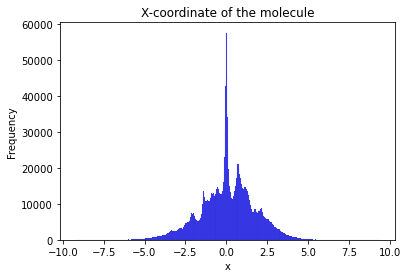

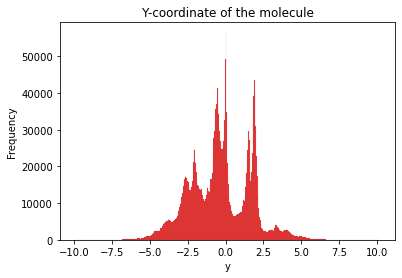

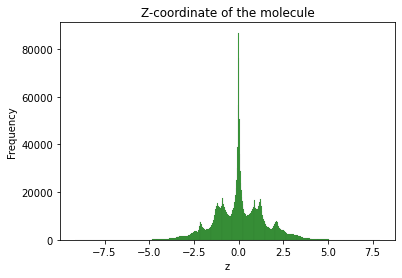

In [14]:
#Histogram to Visualize the distribution of dipole moments in X, Y and Z direction
sns.histplot(df_str.x, color = 'blue')
plt.title('X-coordinate of the molecule')
plt.ylabel("Frequency")
plt.show()
sns.histplot(df_str.y,color = 'red')
plt.title('Y-coordinate of the molecule')
plt.ylabel("Frequency")
plt.show()
sns.histplot(df_str.z, color = 'green')
plt.ylabel("Frequency")
plt.title('Z-coordinate of the molecule')
plt.show()

In [15]:
#As shown in the figures above, the x (blue) coordinate of the molecular structure appears to be a unimodal distibution.
#However, the y (red) and z (green) coordinates appear to be multimodal distributions.
#The y coordinate shows a distrubition with 3 distinct peaks,
#and the z coordinate shows a distrubition with 5 peaks.

<ipython-input-38-38c4864a87bb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df_str[df_train['type']==col]['x'],color = 'blue', kde=False)
<ipython-input-38-38c4864a87bb>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df_str[df_train['type']==col]['y'],color = 'red', kde=False)
<ipython-input-38-38c4864a87bb>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df_str[df_train['type']==col]['z'],color = 'seagreen', kde=False)


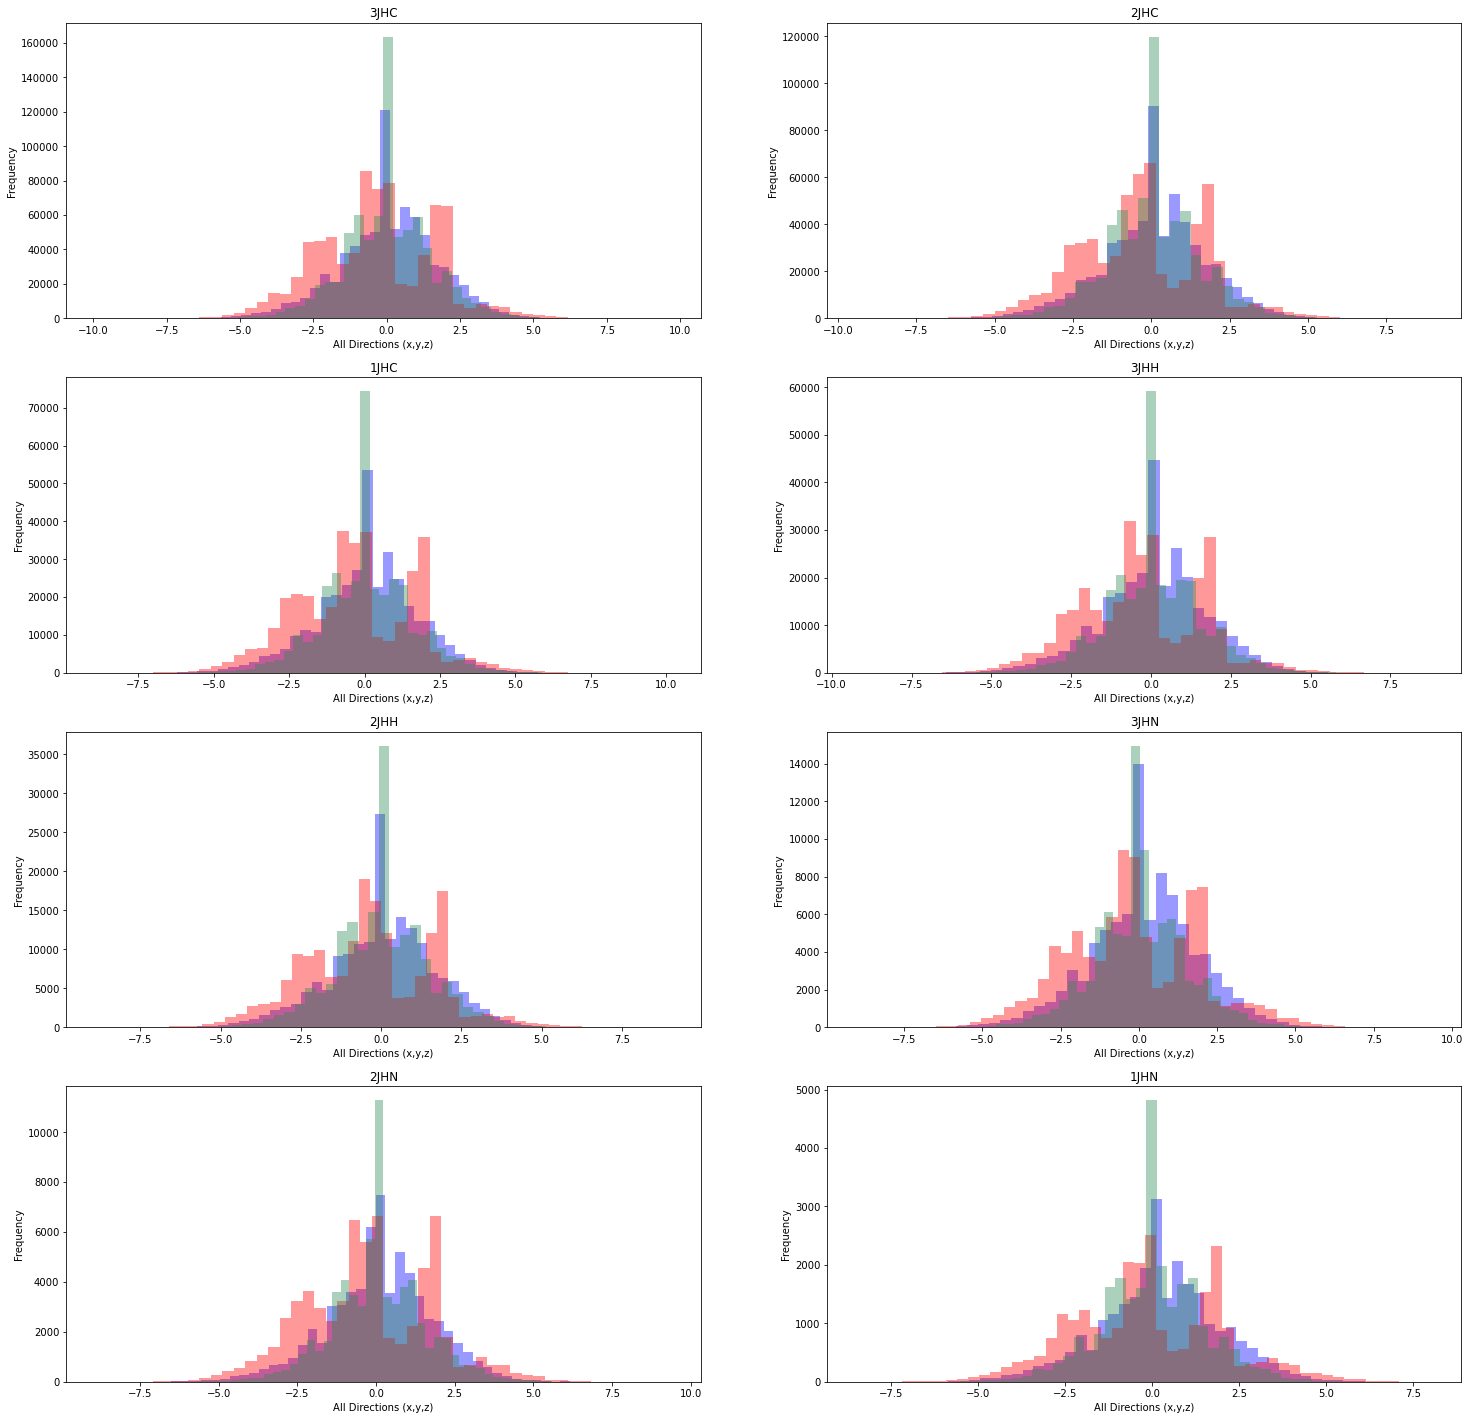

In [38]:
#Distrubtion of structures in all directions (X,Y,Z) for each molecule type (J coupling)
plt.figure(figsize=(25, 25))
for i, col in enumerate(typelist):
    plt.subplot(4,2, i + 1)
    sns.distplot(df_str[df_train['type']==col]['x'],color = 'blue', kde=False)
    plt.ylabel("Frequency")
    plt.xlabel("All Directions (x,y,z)")
    sns.distplot(df_str[df_train['type']==col]['y'],color = 'red', kde=False)
    plt.xlabel("All Directions (x,y,z)")
    plt.ylabel("Frequency")
    sns.distplot(df_str[df_train['type']==col]['z'],color = 'seagreen', kde=False)
    plt.ylabel("Frequency")
    plt.xlabel("All Directions (x,y,z)")
    plt.title(col)

In [17]:
#The figures above illustrates the x coordinate (blue & purple), y coordinate (red & dark pink), and z coordinate (maroon & green)
# for each coupling type. Each coupling type's distribution appears to be noramlly distributed.

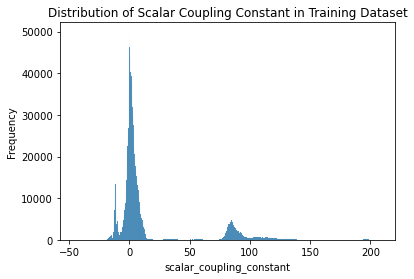

In [18]:
#Visualize the distribution of scalar coupling coefficient in train dataset
sns.histplot(df_train['scalar_coupling_constant'])
plt.ylabel("Frequency")
plt.title('Distribution of Scalar Coupling Constant in Training Dataset')
plt.show()

In [19]:
#From the above graph, we can see that the distribution of scalar_coupling_coefficient is skewed to the left, 
#but the distribution is not perfectly unimodal. 
#There is a significantly smaller peak close to 100 making it bimodal. 
#The mode and mean is approximately 0.

/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

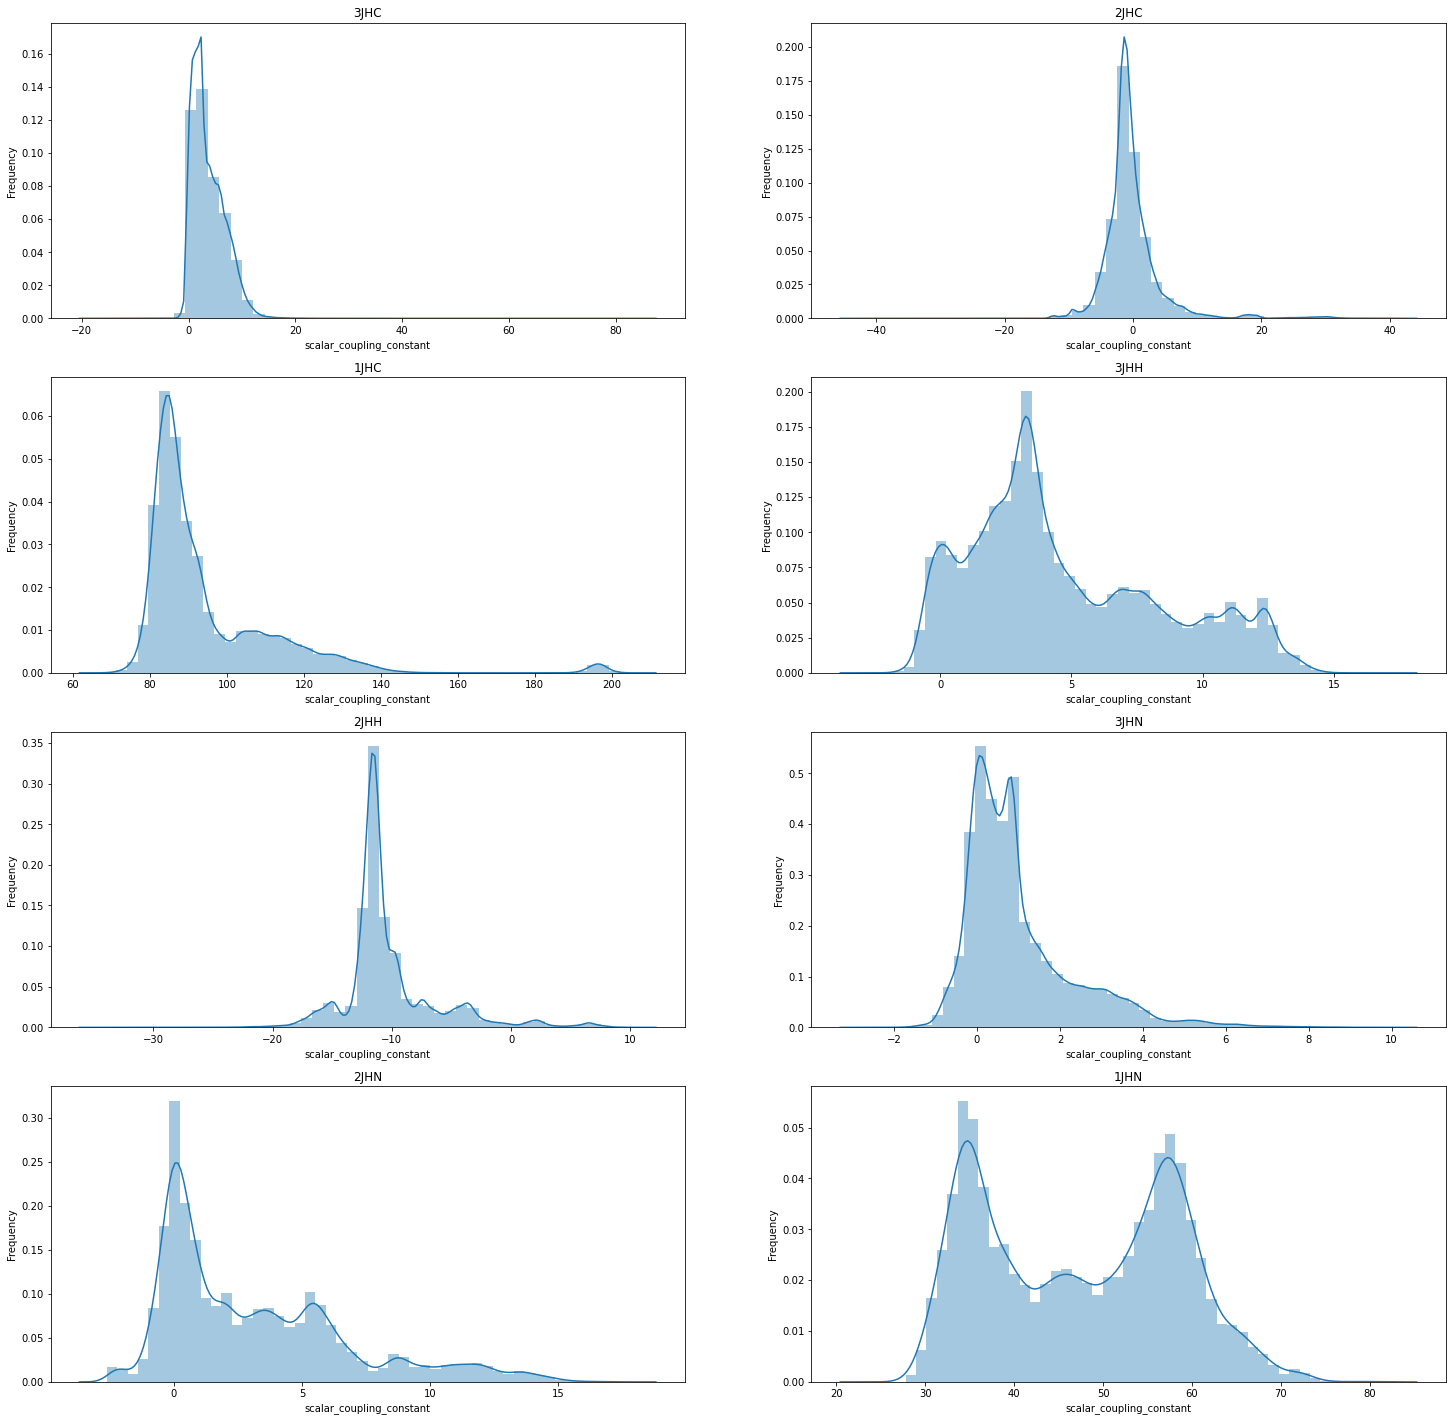

In [20]:
# Visualize the distribution for each molecule type's scalar coupling constant (J coupling)
plt.figure(figsize=(25, 25))
for i, col in enumerate(typelist):
    plt.subplot(4,2, i + 1)
    sns.distplot(df_train[df_train['type']==col]['scalar_coupling_constant'])
    plt.ylabel("Frequency")
    plt.title(col)

In [21]:
#Above, there are the distributions of the target for different molecule categories. 
#Three distributions are unimodal (2JHC, 3JHC, 2JHH). Note 2JHC is very slightly skewed to the right. 
#Three distributions are heavily skewed to the left (1JHC, 3JHH, 2JHN) 
#Two distributions are bimodal (3JHN, 1JHN).

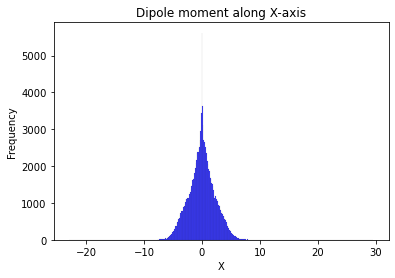

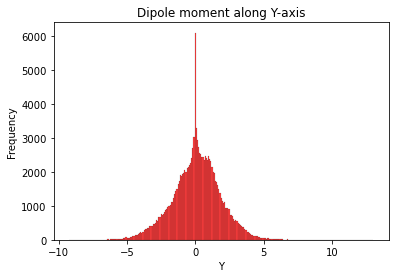

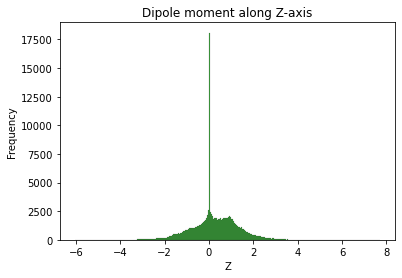

In [22]:
#Histogram to Visualize the distribution of dipole moments in X, Y and Z direction
sns.histplot(df_dip.X, color = 'blue')
plt.title('Dipole moment along X-axis')
plt.ylabel("Frequency")
plt.show()
sns.histplot(df_dip.Y,color = 'red')
plt.title('Dipole moment along Y-axis')
plt.ylabel("Frequency")
plt.show()
sns.histplot(df_dip.Z, color = 'green')
plt.ylabel("Frequency")
plt.title('Dipole moment along Z-axis')
plt.show()

In [23]:
#The distributions of dipole moment along the X and Y axes are approximately normal with a mean of 0, 
#with the X-axis distribution having a greater standard deviation and range. 
#On the other hand, the dipole moment along the Z-axis has a slightly skewed distribution (skewed to the right), 
#with a secondary peak around 1 in addition to the primary peak (mode) above 0.

<ipython-input-37-aab499456c72>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df_dip[df_train['type']==col]['X'],color = 'blue', kde=False)
<ipython-input-37-aab499456c72>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df_dip[df_train['type']==col]['Y'],color = 'red', kde=False)
<ipython-input-37-aab499456c72>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df_dip[df_train['type']==col]['Z'],color = 'green', kde=False)


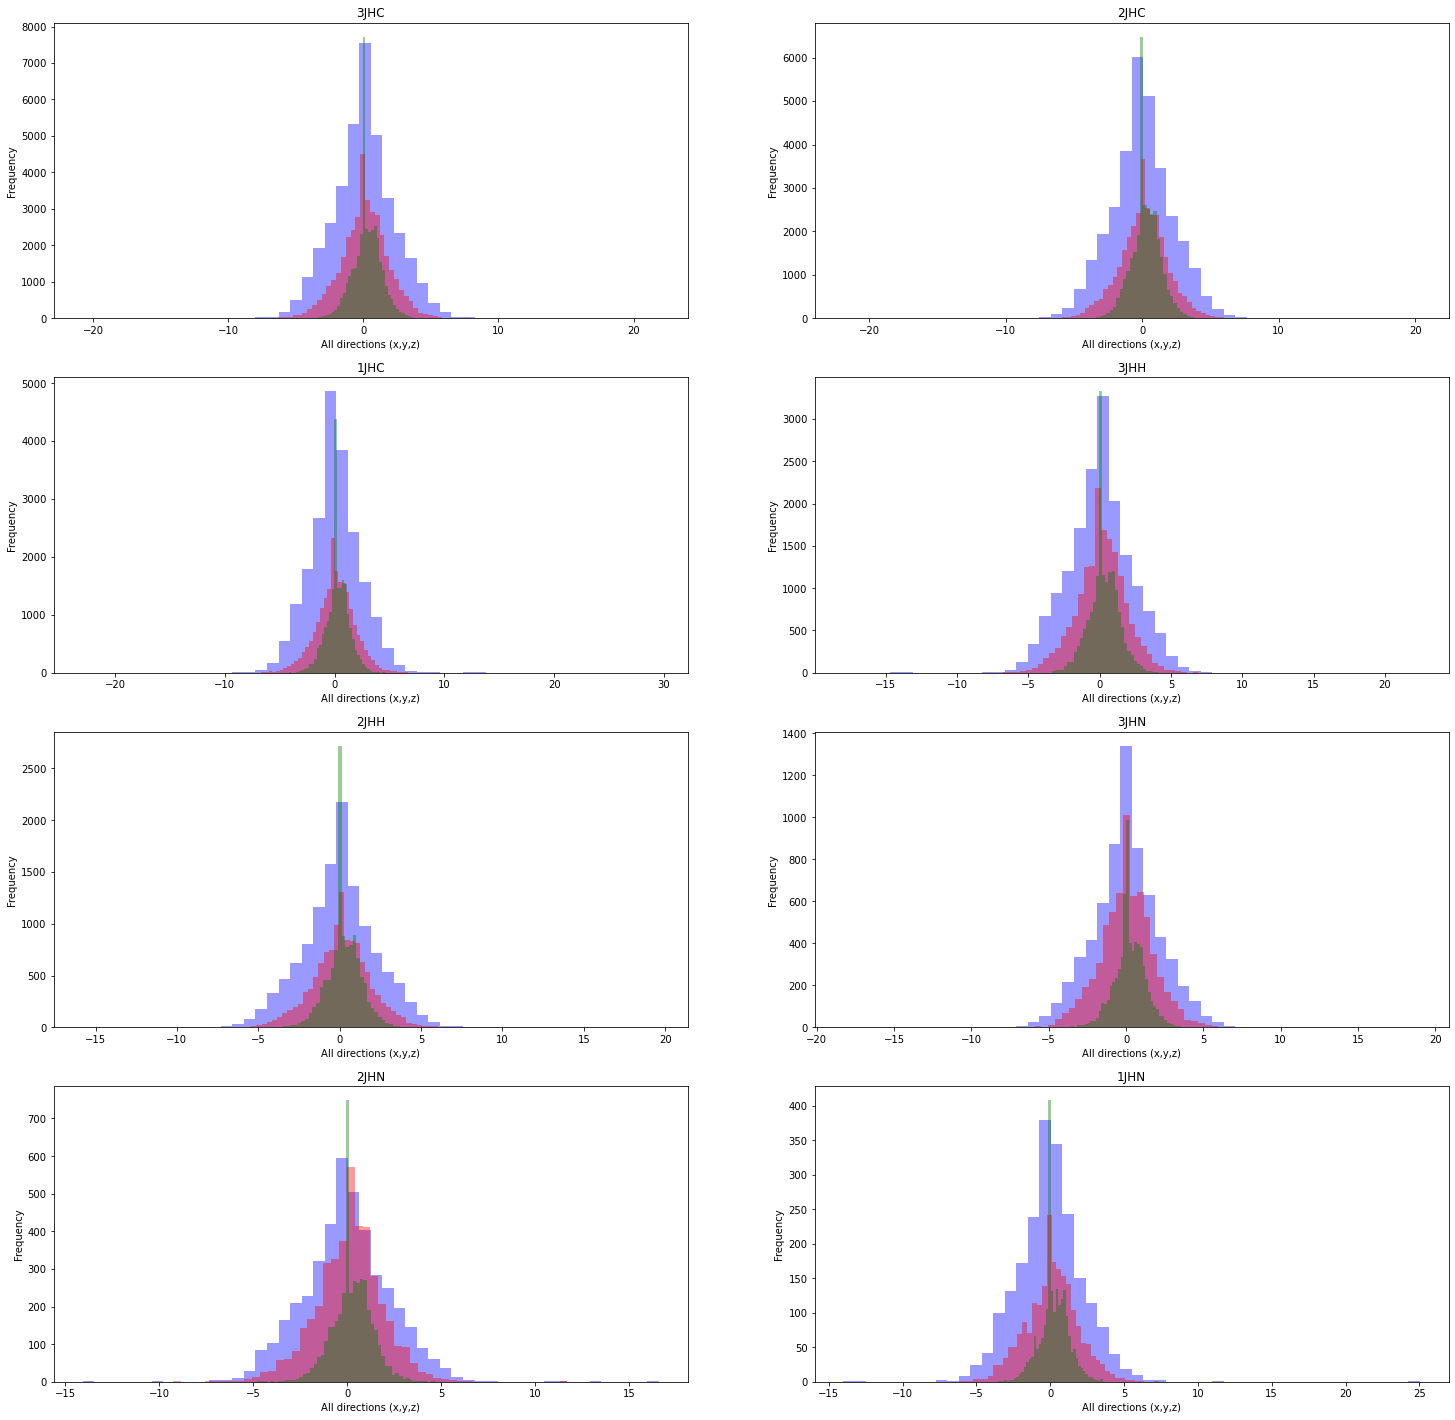

In [37]:
#Distrubtion of each dipole moment in all directions (X,Y,Z charges) for each molecule type (J coupling)
plt.figure(figsize=(25, 25))
for i, col in enumerate(typelist):
    plt.subplot(4,2, i + 1)
    sns.distplot(df_dip[df_train['type']==col]['X'],color = 'blue', kde=False)
    plt.ylabel("Frequency")
    plt.xlabel("All directions (x,y,z)")
    sns.distplot(df_dip[df_train['type']==col]['Y'],color = 'red', kde=False)
    plt.ylabel("Frequency")
    plt.xlabel("All directions (x,y,z)")
    sns.distplot(df_dip[df_train['type']==col]['Z'],color = 'green', kde=False)
    plt.ylabel("Frequency")
    plt.xlabel("All directions (x,y,z)")
    plt.title(col)

In [25]:
#In the above figures, the blue (X), red (Y) and green (Z) distributions represents 
#the dipole moment distributions along the X, Y and Z axes respectively. 
#They all are normal distributions with a mean of 0, 
#but the standard deviation increases from Z (green) to Y (red) to X (blue).

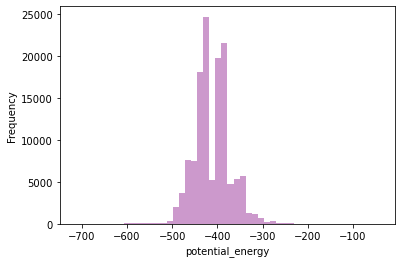

In [26]:
sns.distplot(df_pe.potential_energy, color='purple', kde=False)
plt.ylabel("Frequency")
plt.show()

In [27]:
#The distribution of potential energy of the molecules is approximately normal with a mean of around -400

<ipython-input-28-7524c6f48984>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df_pe[df_train['type']==col]['potential_energy'], color = 'blue')
<ipython-input-28-7524c6f48984>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df_pe[df_train['type']==col]['potential_energy'], color = 'blue')
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-28-7524c6f48984>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df_pe[df_train['type']==col]['potential_energy'], color = 'blue')
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/

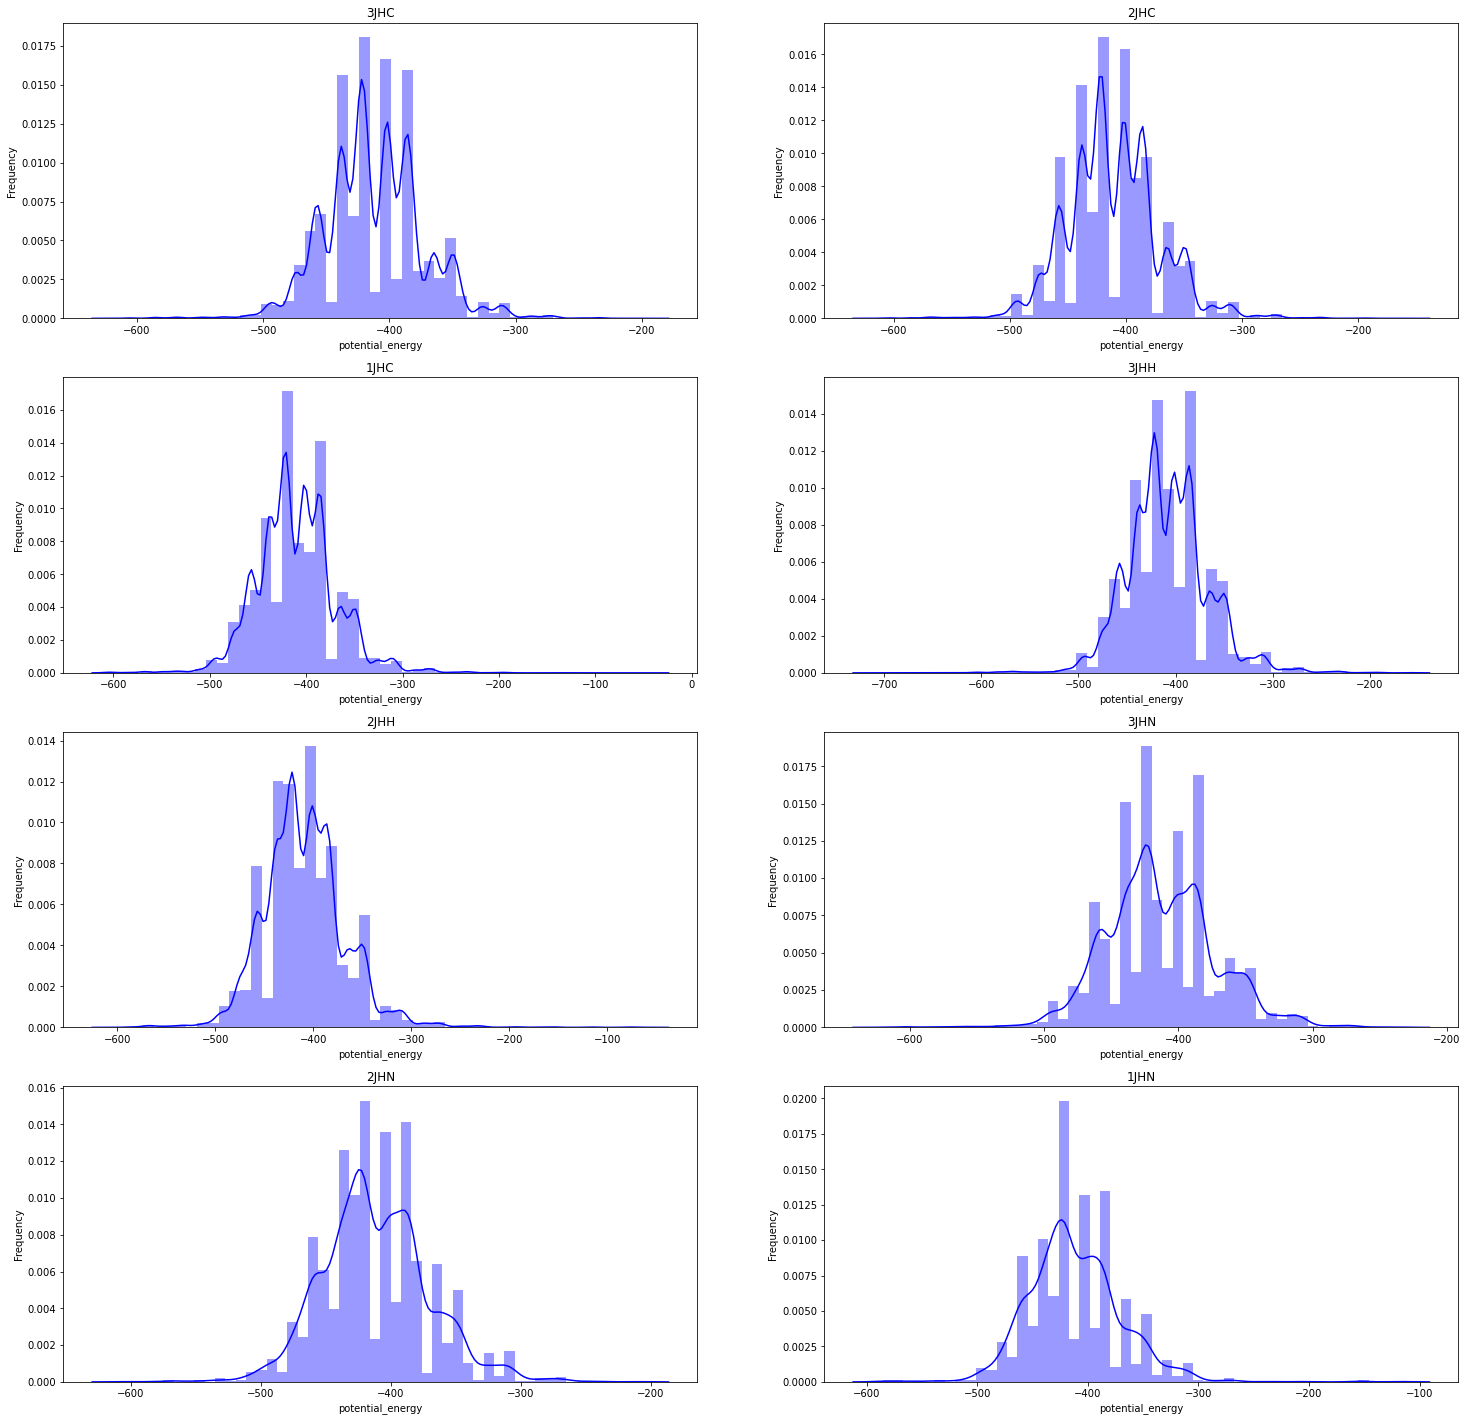

In [28]:
# Visualizing the distribution of potential energy for each molecule type (J Coupling)
plt.figure(figsize=(25, 25))
for i, col in enumerate(typelist):
    plt.subplot(4,2, i + 1)
    sns.distplot(df_pe[df_train['type']==col]['potential_energy'], color = 'blue')
    plt.ylabel("Frequency")
    plt.title(col)

In [29]:
#Above are the distributions of potential energy for each molecule type. 
#One can see the distributions are very different for each molecule type.
#However, the general distribution shape for each type of molecule type is roughly normal.

In [30]:
def is_outlier(points, thresh=3.5):

    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

<ipython-input-30-f55f70e1b598>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


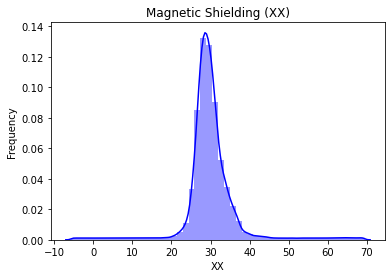

<ipython-input-30-f55f70e1b598>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


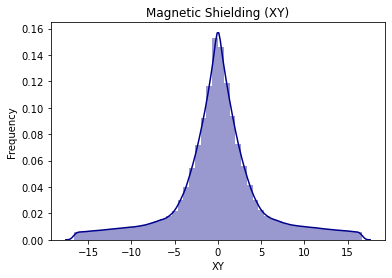

<ipython-input-30-f55f70e1b598>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


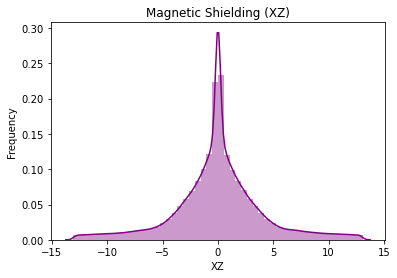

<ipython-input-30-f55f70e1b598>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


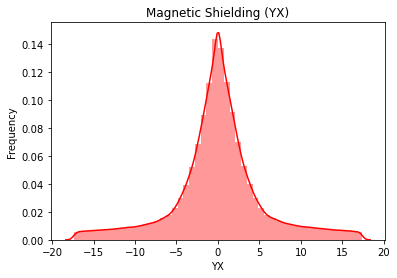

<ipython-input-30-f55f70e1b598>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


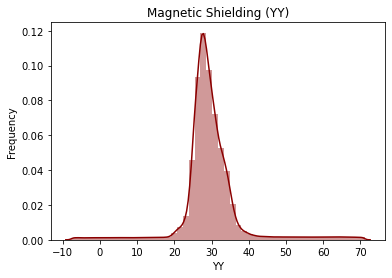

<ipython-input-30-f55f70e1b598>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


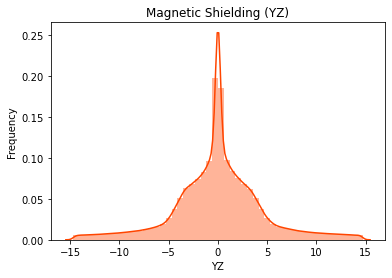

<ipython-input-30-f55f70e1b598>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


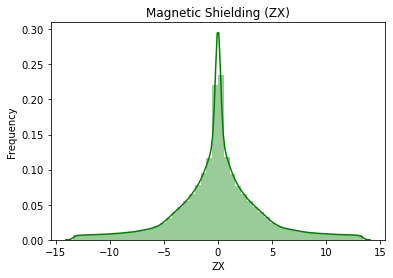

<ipython-input-30-f55f70e1b598>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


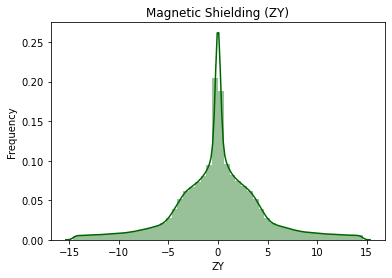

<ipython-input-30-f55f70e1b598>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


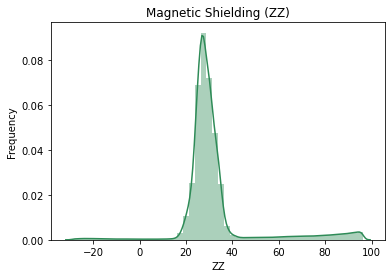

In [31]:
#Visualizing the distribution of the magentic shield tensors in each direction combination without outliers
sns.distplot(df_mst.XX[~is_outlier(df_mst.XX)], color='blue')
plt.title('Magnetic Shielding (XX)')
plt.ylabel("Frequency")
plt.show()

sns.distplot(df_mst.XY[~is_outlier(df_mst.XY)], color='darkblue')
plt.title('Magnetic Shielding (XY)')
plt.ylabel("Frequency")
plt.show()

sns.distplot(df_mst.XZ[~is_outlier(df_mst.XZ)], color='purple')
plt.title('Magnetic Shielding (XZ)')
plt.ylabel("Frequency")
plt.show()

sns.distplot(df_mst.YX[~is_outlier(df_mst.YX)], color='red')
plt.title('Magnetic Shielding (YX)')
plt.ylabel("Frequency")
plt.show()

sns.distplot(df_mst.YY[~is_outlier(df_mst.YY)], color='darkred')
plt.title('Magnetic Shielding (YY)')
plt.ylabel("Frequency")
plt.show()

sns.distplot(df_mst.YZ[~is_outlier(df_mst.YZ)], color='orangered')
plt.title('Magnetic Shielding (YZ)')
plt.ylabel("Frequency")
plt.show()

sns.distplot(df_mst.ZX[~is_outlier(df_mst.ZX)], color='green')
plt.title('Magnetic Shielding (ZX)')
plt.ylabel("Frequency")
plt.show()


sns.distplot(df_mst.ZY[~is_outlier(df_mst.ZY)], color='darkgreen')
plt.title('Magnetic Shielding (ZY)')
plt.ylabel("Frequency")
plt.show()


sns.distplot(df_mst.ZZ[~is_outlier(df_mst.ZZ)], color='seagreen')
plt.title('Magnetic Shielding (ZZ)')
plt.ylabel("Frequency")
plt.show()

In [ ]:
#The distributions of magnetic shielding in each direction seems to be roughly linear with a mean of 0.
#But, some of them have steep, sharp slopes from the peak to the tails (YX for example), 
#while others have smooth, bulgy tails (ZY for example). 
#All of them have unque shapes, but most of them fall under these two categories.

/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


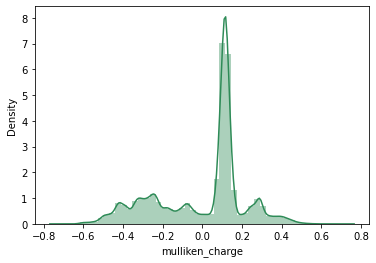

In [32]:
# Visualizing the distribution of muliken charge
sns.distplot(df_mc.mulliken_charge, color = 'seagreen')
plt.show()

/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


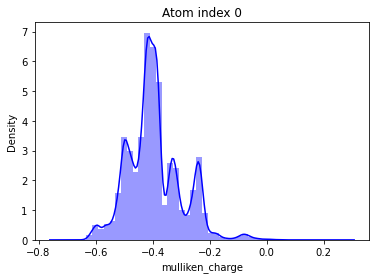

/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


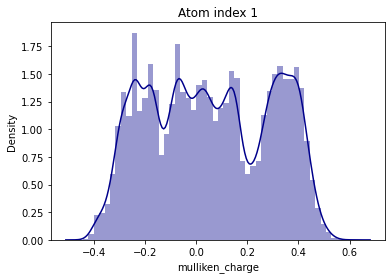

/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


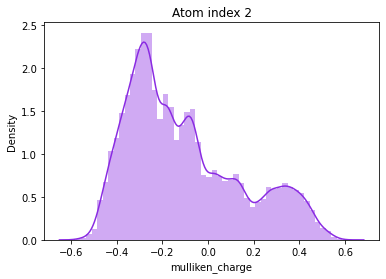

/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


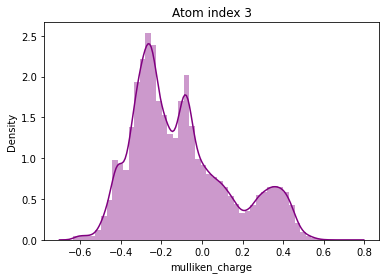

/Users/aminfesharaki/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


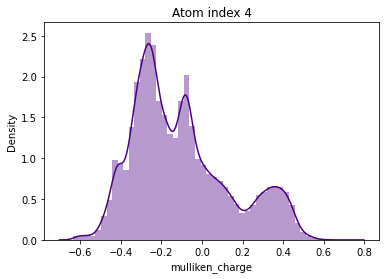

In [33]:
# Visualizing distribution of muliken charge for each atom index
sns.distplot(df_mc.loc[df_mc.atom_index == 0].mulliken_charge, color = 'blue')
plt.title('Atom index 0')
plt.show()
sns.distplot(df_mc.loc[df_mc.atom_index == 1].mulliken_charge, color = 'darkblue')
plt.title('Atom index 1')
plt.show()
sns.distplot(df_mc.loc[df_mc.atom_index == 2].mulliken_charge, color = 'blueviolet')
plt.title('Atom index 2')
plt.show()
sns.distplot(df_mc.loc[df_mc.atom_index == 3].mulliken_charge, color = 'purple')
plt.title('Atom index 3')
plt.show()
sns.distplot(df_mc.loc[df_mc.atom_index == 3].mulliken_charge, color = 'indigo')
plt.title('Atom index 4')
plt.show()

In [34]:
#As one can see from the distributions above, atom index 0 and atom index 1 have a quadmodal (4 peaks) distribution.
#Atom index's 2, 3, and 4 exhibit a similar multimodal distribution that is skewed to the right.
#The means of the distributions tend to decrease as the atom index increases 
#(the mulliken charges are higher for lower atom indices)
